In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../data/pakistan_temps_w_time.csv", index_col="date")
df.index = pd.to_datetime(df.index, format="%Y-%m-%d")
df

,temp,time
date,,
1901-01-15,7.72768,0
1901-02-15,8.93600,1
1901-03-15,16.96320,2
1901-04-15,21.27410,3
1901-05-15,26.04970,4
...,...,...
2016-08-15,27.63320,1387
2016-09-15,26.71790,1388
2016-10-15,22.39820,1389


In [3]:
def add_features(df):

    df = df.copy()

    #weekofyear, month, year
    df["weekofyear"] = df.index.isocalendar().week
    df["month"] = df.index.month
    df["year"] = df.index.year

    #lags 
    #1, 2, 12
    df["lag_1m"] = df["temp"].shift(1)
    df["lag_2m"] = df["temp"].shift(2)
    df["lag_12m"] = df["temp"].shift(12)

    return df  

In [4]:
df = add_features(df)
df

,temp,time,weekofyear,month,year,lag_1m,lag_2m,lag_12m
date,,,,,,,,
1901-01-15,7.72768,0,3,1,1901,NaN,NaN,NaN
1901-02-15,8.93600,1,7,2,1901,7.72768,NaN,NaN
1901-03-15,16.96320,2,11,3,1901,8.93600,7.72768,NaN
1901-04-15,21.27410,3,16,4,1901,16.96320,8.93600,NaN
1901-05-15,26.04970,4,20,5,1901,21.27410,16.96320,NaN
...,...,...,...,...,...,...,...,...
2016-08-15,27.63320,1387,33,8,2016,29.65740,30.21440,27.7268
2016-09-15,26.71790,1388,37,9,2016,27.63320,29.65740,25.3179
2016-10-15,22.39820,1389,41,10,2016,26.71790,27.63320,22.3790


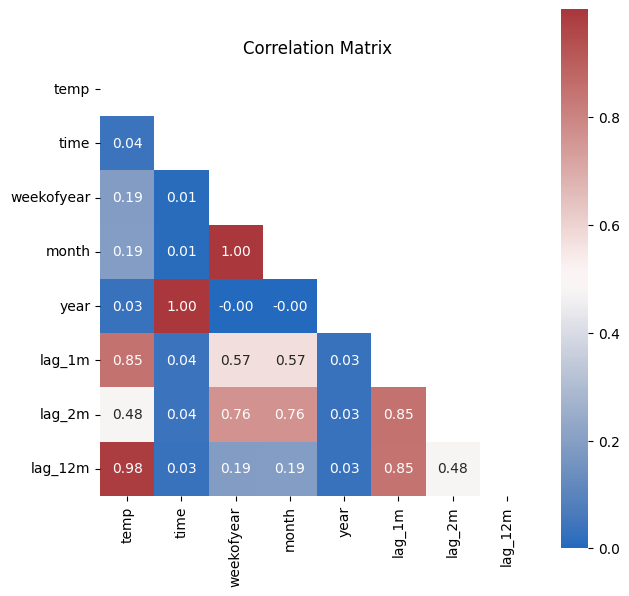

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))  # mask upper triangle

plt.figure(figsize=(7, 7))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap="vlag", square=True)
plt.title("Correlation Matrix")
plt.show()

In [6]:
df.columns

Index(['temp', 'time', 'weekofyear', 'month', 'year', 'lag_1m', 'lag_2m',
       'lag_12m'],
      dtype='object')

In [7]:
features = ['time', 'weekofyear', 'month', 'year', 'lag_1m', 'lag_2m','lag_12m']
target = ['temp']

In [8]:
train_size = 0.8
n = len(df)
train = df.iloc[:int(n*train_size)].copy()
test = df.iloc[int(n*train_size):].copy()

X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

In [9]:
from xgboost import XGBRegressor
model = XGBRegressor(random_state=0)

In [10]:
model.fit(X_train,y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [11]:
preds = model.predict(X_test)

In [12]:
test["preds"] = preds
test

,temp,time,weekofyear,month,year,lag_1m,lag_2m,lag_12m,preds
date,,,,,,,,,
1993-10-15,20.58060,1113,41,10,1993,25.85370,27.8340,20.65920,20.932560
1993-11-15,16.41520,1114,46,11,1993,20.58060,25.8537,15.64000,16.481503
1993-12-15,11.47590,1115,50,12,1993,16.41520,20.5806,12.15240,12.664344
1994-01-15,9.52572,1116,2,1,1994,11.47590,16.4152,8.77164,8.673933
1994-02-15,10.39700,1117,7,2,1994,9.52572,11.4759,13.26860,12.927651
...,...,...,...,...,...,...,...,...,...
2016-08-15,27.63320,1387,33,8,2016,29.65740,30.2144,27.72680,27.524769
2016-09-15,26.71790,1388,37,9,2016,27.63320,29.6574,25.31790,24.503468
2016-10-15,22.39820,1389,41,10,2016,26.71790,27.6332,22.37900,20.994001


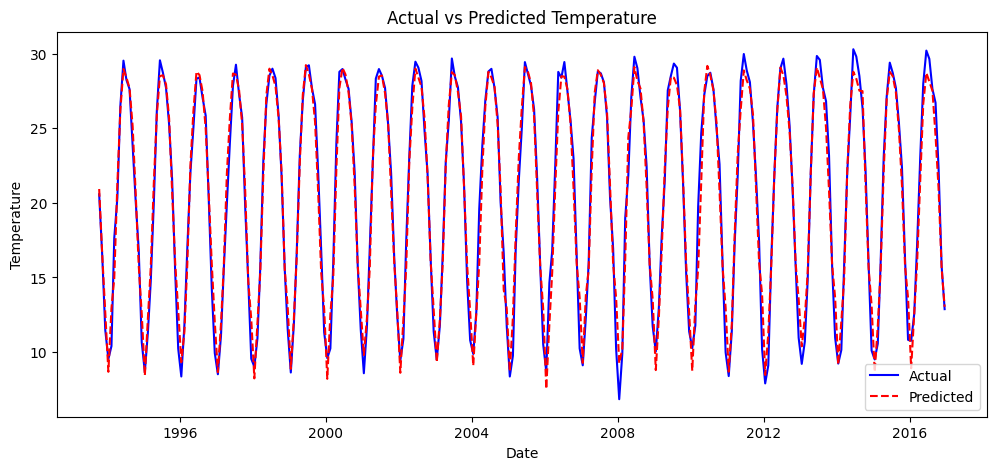

In [13]:
plt.figure(figsize=(12, 5))
plt.plot(test.index, test["temp"], label="Actual", color="blue")
plt.plot(test.index, test["preds"], label="Predicted", color="red", linestyle="--")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.title("Actual vs Predicted Temperature")
plt.legend()
plt.show()